

# Project: Cyclist Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Ask">Ask Phase</a></li>
<li><a href="#Prepare">Prepare Phase</a></li>
<li><a href="#process">Process Phase</a></li>
<li><a href="#analyze">Analyze Phase</a></li>
<li><a href="#share">Share</a></li>
</ul>

<a id='intro'></a>
## Introduction

A fictional bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Dataset Description 

<li>Trip_id : Trip Id</li>
<li>Start_time : start time of the trip</li>
<li>End_time : end time of the trip</li>
<li>Bike_id: Bike Id</li>
<li>trip_duration : trip length</li>
<li>from_station_id : starting station id</li>
<li>from_station_name : starting station name</li>
<li>to_station_id : starting station id</li>
<li>to_station_name : starting station name</li>
<li>usertype : subscriber or customar</li>
<li>gender : male or female</li>
<li>birthyear : user birthyear </li>


<a id='Ask'></a>
## Ask Phase

Following the steps of the data analysis process: **Ask**, Prepare, Process, Analyze, Share, and Act.

In this intial phase of our project we want to ask our stakeholders questions to fully understand our projects also identify questions to answer from our analysis, so our first approch is to **clearly** identify the business task then to introduce our question to the analysis

### Statement of the business task

Design marketing strategies aimed at converting casual riders into annual members.

### Question(s) for Analysis

> **Q1** How do annual members and casual riders use Cyclistic bikes differently?

> **Q2** Which age group has the most annual members ?

> **Q3** What do annaual users gain from the membership that casual users do not?


<a id='Prepare'></a>
## Prepare Phase

Following the steps of the data analysis process: Ask, **Prepare** , Process, Analyze, Share, and Act.

In the next phase after defining our objective we will gather and assess our data in other terms we will perform **Data Wrangling**, in which we will perform two steps, first we will load the data to our workspace, then we will proceed to assing the data and making sure that the quality and structure of it is right.

### Data Gathering

Data was gathered from [divvy trip data](https://divvy-tripdata.s3.amazonaws.com/index.html) , we have choosen to work with the data of 2019 to drive our assumptions


### Data assessment

let's take a look at our data to validate it's consistency, quality and structure

In [1]:
# importing important libararies 
import numpy as np
import pandas as pd
from zipfile import ZipFile
import itertools

In [2]:
# extracting data in jupyter workspace 
with ZipFile('specialization data.zip','r') as zip :
    zip.extractall()

In [3]:
#importing four quarters data
data_Q1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
data_Q2 = pd.read_csv('Divvy_Trips_2019_Q2.csv')
data_Q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
data_Q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

we will assess every dataset on its own but we will keep the generalize column names and data types over the datasets 

we will start with the first quarter

In [4]:
data_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


for starters bikeid, tripduration and usertype need to follow the standard naming conventions

trip_duration need to be in minutes not seconds as it will be easier to comprehend 

birthyear need to be converted into age so we can devide the users into age groups and discover insights withen age group

In [5]:
data_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


we have missing data in both the gender and the birthyear, trip_duration,start_time and end_time types need to be adjusted 

In [6]:
assert len(data_Q1.gender.unique()) == 3
assert len(data_Q1.usertype.unique()) == 2

we made sure there is no inconsistent data entries because in gender there is male,female and NaN hence '==3' but in usertype there is subscriber and customer hence '==2'

In [7]:
data_Q1.duplicated().sum()

0

we have no duplicates in this dataset

Doing the same steps for the remaining quadrants 

In [8]:
data_Q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


All columns names have to be changed to follow the standard naming convention 

In [9]:
data_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

missing data in gender and birth year also trip_duration, start and end time datatypes need to be fixed


In [10]:
assert len(data_Q2['Member Gender'].unique()) == 3
assert len(data_Q2['User Type'].unique()) == 2

we made sure there is no inconsistent data entries because in gender there is male,female and NaN hence '==3' but in usertype there is subscriber and customer hence '==2'

In [11]:
data_Q2.duplicated().sum()

0

zero duplicates


In [12]:
data_Q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [13]:
data_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  object 
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1353368 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 150.2+ MB


usual missing data and datatypes need to be fixed

In [14]:
assert len(data_Q3.gender.unique()) == 3
assert len(data_Q3.usertype.unique()) == 2

we made sure there is no inconsistent data entries because in gender there is male,female and NaN hence '==3' but in usertype there is subscriber and customer hence '==2'

In [15]:
data_Q3.duplicated().sum()

0

no duplicates here

In [16]:
data_Q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [17]:
data_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  object 
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             637463 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [18]:
assert len(data_Q4.gender.unique()) == 3
assert len(data_Q4.usertype.unique()) == 2

In [19]:
data_Q4.duplicated().sum()

0

same changes in the past three datasets 

So now we know the changes that need to be done to each dataset so we can analyze our data correctly, next step is data cleaning, it is time to take care of our problems 

<a id='process'></a>
## Process Phase

Following the steps of the data analysis process: Ask, Prepare , **Process** , Analyze, Share, and Act.

Now we start cleaning our data and processing it so we can produce valid visualizations and conclusions from it, Also this is the last step of **Data Wrangling** Data Cleaning



We will start by generalizing column names in the four datasets

In [20]:
for df in [data_Q1,data_Q3,data_Q4]:
    df.rename(columns = {'bikeid':'bike_id', 'tripduration':'trip_duration',
                              'usertype':'user_type'}, inplace = True)

In [21]:
general_col_names = data_Q1.columns
col_names_data_Q2=data_Q2.columns
for (i,v) in itertools.zip_longest(general_col_names,col_names_data_Q2):
    data_Q2.rename(columns = {v : i},inplace=True)
data_Q2.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


Now we our datasets have the same column names, next let's fix the rest of the issues

In [22]:
combined_data=[data_Q1,data_Q2,data_Q3,data_Q4]
for df in combined_data:
    #fixing start and end time data types
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    
    #converting trip into minutes
    df['duration'] = (df.end_time - df.start_time).dt.total_seconds() /60
    
    #adding age column and weekday for further invistagation
    df['Age']=2022 - df.birthyear
    df['weekday']=df.start_time.dt.day_name()
    
    #adding age groups 
    df.loc[((df.Age <3)) , 'age_group'] = 'too young'
    df.loc[((df.Age >=3) & (df.Age <14)) , 'age_group'] = 'Kid'
    df.loc[((df.Age >=14) & (df.Age <21)) , 'age_group'] = 'Teen'
    df.loc[((df.Age >=21) & (df.Age <45)) , 'age_group'] = 'Adult'
    df.loc[((df.Age >=45)) , 'age_group'] = 'Senior'
    df.loc[((df.Age >90)) , 'age_group'] = 'too old'



In [23]:
data_Q1.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,duration,Age,weekday,age_group
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,6.500000,33.0,Tuesday,Adult
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,7.350000,32.0,Tuesday,Adult
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,13.816667,28.0,Tuesday,Adult
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,29.716667,29.0,Tuesday,Adult
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,6.066667,28.0,Tuesday,Adult


Now all of our data are prepared for further investigation just one last validation before we proceed to the analyze phase

we are going to search for inconsistent data entry which mean that we are searching for typos and outliers in 


> <li>duration, user type, gender, Age</li>


In [24]:
#duration 
#lets see if there is any trips lessthan 0 minutes 
for df in combined_data:
    assert min(df.duration) > 1
print('data is consistent')

AssertionError: 

there is an error in data_Q4 

In [25]:
data_Q4.query('duration < 1')

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,duration,Age,weekday,age_group
384478,25625830,2019-11-03 01:43:21,2019-11-03 01:09:56,4141,"1,594.0",632,Clark St & Newport St,133,Kingsbury St & Kinzie St,Customer,Male,1995.0,-33.416667,27.0,Sunday,Adult
384483,25625836,2019-11-03 01:46:01,2019-11-03 01:10:44,6329,"1,483.0",373,Kedzie Ave & Chicago Ave,498,California Ave & Fletcher St,Customer,NaN,NaN,-35.283333,NaN,Sunday,NaN
384485,25625838,2019-11-03 01:47:49,2019-11-03 01:02:40,964,891.0,229,Southport Ave & Roscoe St,87,Racine Ave & Fullerton Ave,Subscriber,Female,1987.0,-45.150000,35.0,Sunday,Adult
384486,25625839,2019-11-03 01:48:04,2019-11-03 01:16:48,2214,"1,724.0",131,Lincoln Ave & Belmont Ave,131,Lincoln Ave & Belmont Ave,Subscriber,Male,1996.0,-31.266667,26.0,Sunday,Adult
384487,25625841,2019-11-03 01:50:31,2019-11-03 01:04:25,4179,834.0,298,Lincoln Ave & Belle Plaine Ave,258,Logan Blvd & Elston Ave,Subscriber,Male,1975.0,-46.100000,47.0,Sunday,Senior
384489,25625843,2019-11-03 01:51:59,2019-11-03 01:03:02,2920,663.0,460,Clark St & Bryn Mawr Ave,238,Wolcott (Ravenswood) Ave & Montrose Ave,Subscriber,Male,1992.0,-48.950000,30.0,Sunday,Adult
384490,25625844,2019-11-03 01:51:55,2019-11-03 01:04:33,3338,757.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,-47.366667,NaN,Sunday,NaN
384491,25625845,2019-11-03 01:53:08,2019-11-03 01:04:53,2142,705.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,-48.250000,NaN,Sunday,NaN
384492,25625846,2019-11-03 01:53:10,2019-11-03 01:04:53,5877,703.0,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Customer,NaN,NaN,-48.283333,NaN,Sunday,NaN
384493,25625847,2019-11-03 01:53:24,2019-11-03 01:06:08,3984,764.0,484,Monticello Ave & Irving Park Rd,484,Monticello Ave & Irving Park Rd,Customer,NaN,NaN,-47.266667,NaN,Sunday,NaN


we see multiple entries where end date is earlier than start date, in our case since we relatively big dataset we will drop them 

In [26]:
data_Q4.drop(data_Q4.query('duration < 1').index,axis = 0, inplace = True)
for df in combined_data:
    assert min(df.duration) > 1
print('duration is consistent')

duration is consistent


In [27]:
#user_type and gennder attributes 
for df in combined_data:
    assert len(df.user_type.unique()) ==2
    # =3 because there is missing values which will be impelmented as nan
    assert len(df.gender.unique()) ==3
print('user type is consistent')

user type is consistent


In [28]:
#we will check Age for less than 2 years and above 100 years
for df in combined_data:
    assert min(df.Age) >2
    assert max(df.Age) <101

AssertionError: 

we have ages above 100 years old 

In [29]:
Age_above_100=0
for df in combined_data:
    Age_above_100 += df.query('Age >100').shape[0]
Age_above_100    

1031

we can see that there is about 1000 inconsitent data entries in our data, let's drop them 

In [30]:
for df in combined_data:
    df.drop(df.query('Age >100').index,axis = 0, inplace = True)
    assert min(df.Age) >2
    assert max(df.Age) <101
print('Age is clean')    

Age is clean


Finally now our data is both consistent and clean, now we are ready to proceed to the next phase of our analysis and our most exciting one 

<a id='analyze'></a>

## Analyze Phase

Following the steps of the data analysis process: Ask, Prepare , Process , **Analyze**, Share, and Act.

Since our data is now complete, valid, accurate and consistent, we are now ready for the most exciting phase in our analysis, in which we visualize our data trends and reach an answer to our business problem, Also the main process of the analyze phase is Exploratory Data Analysis "EDA" so let's begin

### Exploratory Data Analysis

Refresher on the business question "How do annual members and casual riders use Cyclistic bikes differently?"

now we need to view the attributes that help us reach a conclusion about the answer to this question 

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# creating a function that we pass the data to it and it creates plots over our four quarters 
# we pass the dataframes, attribute that we want to see over the four seasons and
# our most important attribute that we want to see it it's behavior related to other attributes

def plot_relations(data,attribute_to_compare,compare_about):
    rows= len(data)//2
    cols=2
    dataset_name=['1st quarter','2nd quarter','3rd quarter','4th quarter']
    #setting up plot grid and colors
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,15))
    color =['orangered']
    #adjusting plot margins
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4) 
    #loop to plot graphs in a grid
    #plot over the rows 
    data_no = 0
    for i in range(rows) :
        #plot over the columns
        for j in range(cols):
            sns.countplot(data = data[data_no],x=attribute_to_compare,hue = compare_about,
                              ax =axes[i,j])
            
            axes[i,j].title.set_text('%s data'%(dataset_name[data_no]))
            #axes[i,j].set_ylabel('')
            #axes[i,j].set_xlabel(''%())
            axes[i-1,j-1].tick_params(axis='x', rotation=45)
            data_no = data_no + 1
    


<AxesSubplot:xlabel='age_group', ylabel='count'>

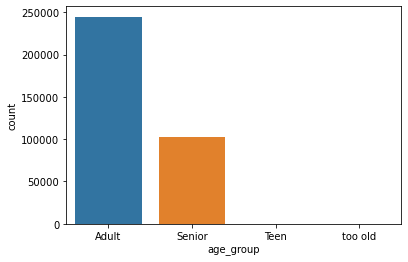

In [64]:
#first lets see which age group uses the bikes the most 
sns.countplot(data=data_Q1,x=data_Q1.age_group)

we see that adults are more than 50% of our users 

<AxesSubplot:xlabel='age_group', ylabel='count'>

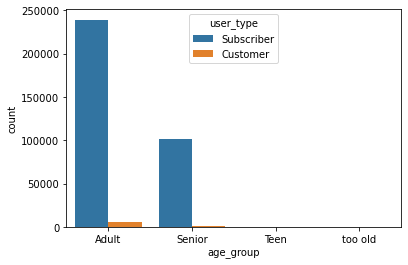

In [65]:
#how many of age_groups are subscribers !?
sns.countplot(x=data_Q1.age_group,hue = data_Q1.user_type)

now we can see that most of our users are subscribers, but htis is only the first quarter of the year, so in other words we have low customers in the beginning of the year 

<BarContainer object of 2 artists>

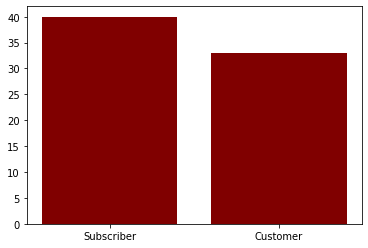

In [110]:
#what is the mean age for subscribers and customers ?
age_mean = [round(data_Q1[data_Q1.user_type == 'Subscriber']['Age'].mean()),round(data_Q1[data_Q1.user_type == 'Customer']['Age'].mean())]
plt.bar(['Subscriber','Customer'],age_mean,color='maroon')

average age for subscribers 40 years while for customers 33 years so our subscribers are usually older than our customers

<BarContainer object of 2 artists>

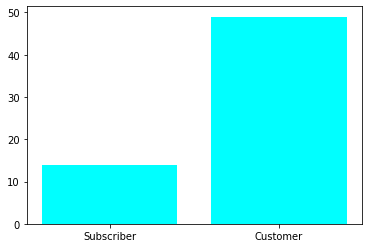

In [106]:
#how long do subscribers ride comparing to customers ?
duration_mean = [round(data_Q1[data_Q1.user_type == 'Subscriber']['duration'].mean()),
            round(data_Q1[data_Q1.user_type == 'Customer']['duration'].mean())]
plt.bar(['Subscriber','Customer'],duration_mean,color='Aqua')

Surperisingly customers average trips are **435%** longer than subscribers this shows a point we can use in our marketing startegy 

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

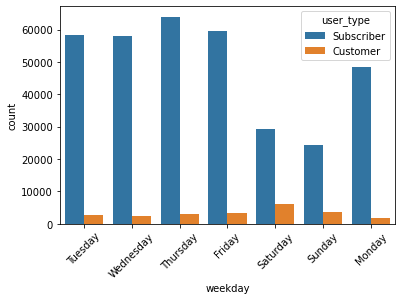

In [68]:
#last of the examination for one quadrant we see which day each user type prefers
sns.countplot(data_Q1.weekday, hue=data_Q1.user_type)
plt.xticks(rotation=45)

So we can see that Subscribers ride their bikes during the week but the tend to ignore it in the weekend days and customers are the complete oposite of that so maybe our subscribers take their bikes to work while our customers tend to enjoy it in the weekends

Now we will do the past 4 plots in 4 quarters to gain more insights 

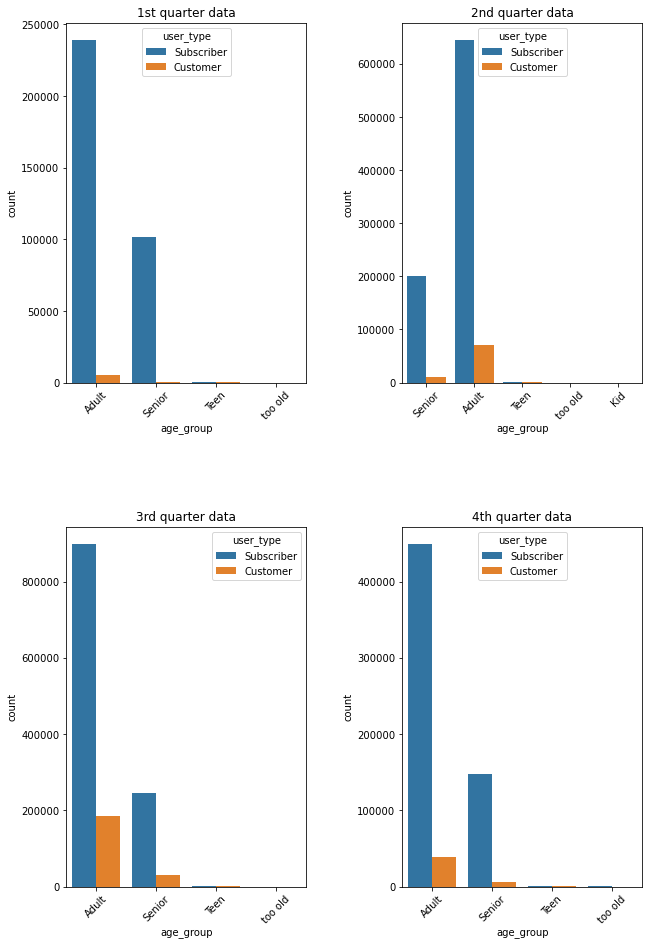

In [76]:
plot_relations(combined_data,'age_group','user_type')

we can see from plots over the 4 seasons that our riders are mostly adults whether it is a subscriber or a customer 

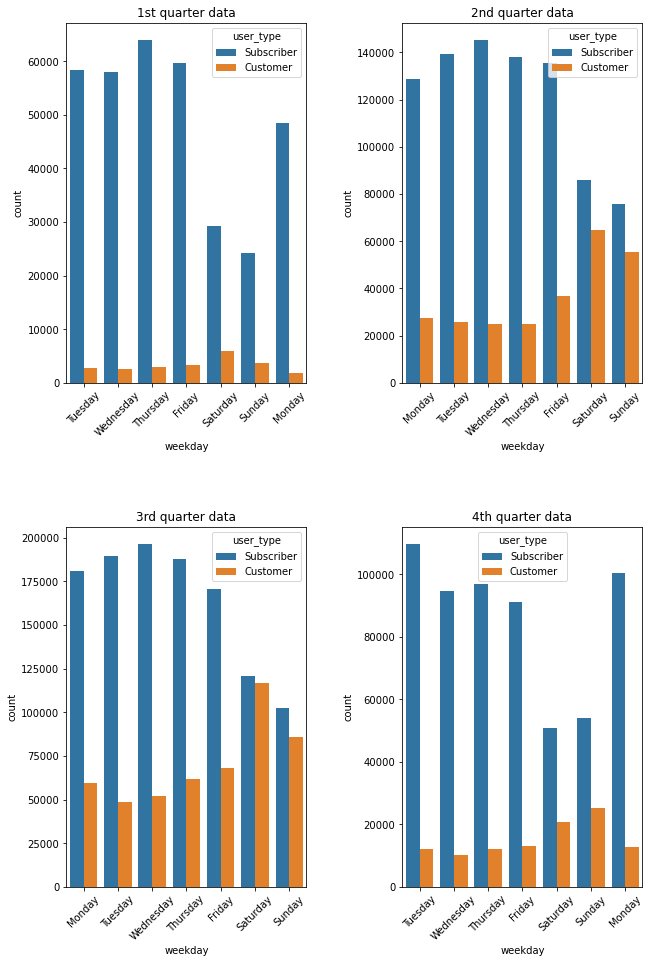

In [77]:
plot_relations(combined_data,'weekday','user_type')


This plot on the other hand is really usefull it tells us that there is a spike in customers during the weekends and during the warm weather, we can see clearly the effect of the summer on our customers compared to the winter, this is crucial in chossing the timing of your marketing campain

In [105]:
#more statistaclly answer on the increase in the summer 

#winter ratio
total_count,u,user_type,user_type_count=data_Q1.loc[(data_Q1.weekday == 'Saturday')|(data_Q1.weekday == 'Sunday')]['user_type'].describe()
#ratio of customers to Subscribers in weekends of the winter 
winter_ratio=round(((total_count-user_type_count)/total_count )*100)

#summer ratio
total_count,u,user_type,user_type_count=data_Q3.loc[(data_Q3.weekday == 'Saturday')|(data_Q3.weekday == 'Sunday')]['user_type'].describe()
#ratio of customers to Subscribers in weekends of the winter 
summer_ratio=round(((total_count-user_type_count)/total_count )*100)

print('winter customer riders in weekends are %d percent from total customers while summer customer riders are at %d percent'
      %(winter_ratio,summer_ratio))

winter customer riders in weekends are 15 percent from total customers while summer customer riders are at 48 percent


we see that increase in weekends specially in the summer more clearly now, so in this phase of analysis we have reached an idea to seperate subscribers from customers and to identify the behavior of each of them, for example how they are diffrent in age, average ride length and when do they ride their bikes in the next phase we will see our conclusion presented clearly with our recommendations 

<a id='share'></a>

## Share Phase

Following the steps of the data analysis process: Ask, Prepare , Process , Analyze, **Share**, and Act.

Now we present our finding to our skateholders, we choose our data visualization and combine them with our statistical calculations, we inform them with our recommendations based on our findings, this is where  we normally use tableau, power bi or powerpoint 

to keep in mind our business question "How do annual members and casual riders use Cyclistic bikes differently?"

#### Q1 - How do annual members and casual riders use Cyclistic bikes differently?

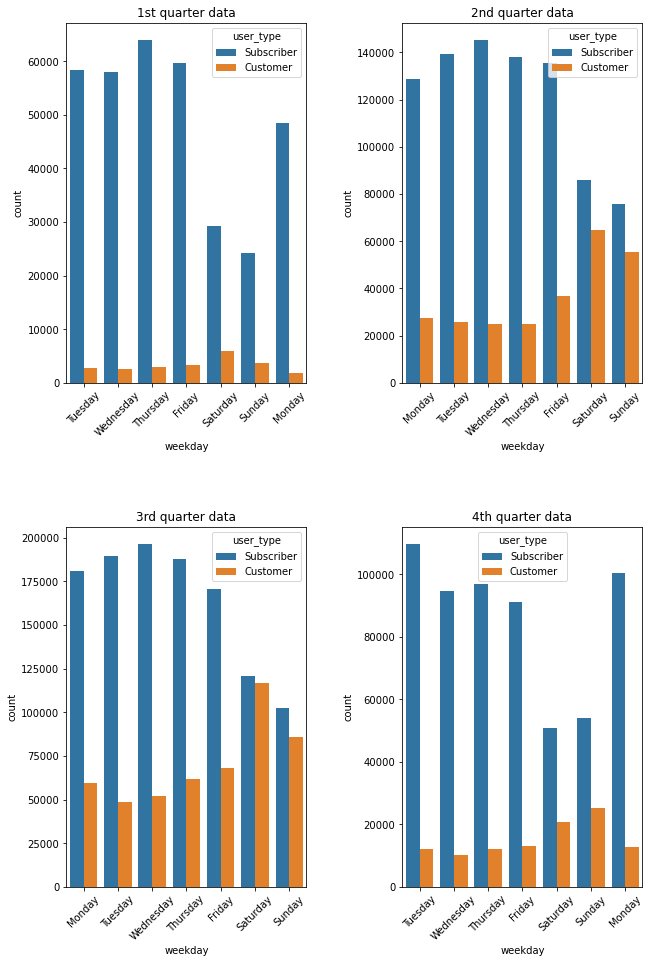

In [113]:
plot_relations(combined_data,'weekday','user_type')

we can see that two important insights here 

> **Subscribers** tend to ride bikes through out the week and inore it in the weekends 

> **Customers** tend to ride bikes in the weekends not through the week 

So we know that subscribers normally uses the bike for daily tasks like comuting to work for example, but customers on the other hand uses the bikes for fun in the weekends rather than daily tasks 

> **Customers** represent nearly 50% of users on weekends in the summer 

we see that the number of customers gradually increase as we move into hot weather and reaches nearly 50% of users on weekends 

Now recomendation based on this would be to start the marketing campain in the summer and to have discounts in the weekends as these days have the most number of customers 

<BarContainer object of 2 artists>

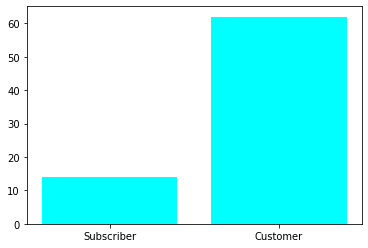

In [114]:
#how long do subscribers ride comparing to customers ?
duration_mean = [round(data_Q1[data_Q1.user_type == 'Subscriber']['duration'].mean()),
            round(data_Q1[data_Q1.user_type == 'Customer']['duration'].mean())]
plt.bar(['Subscriber','Customer'],duration_mean,color='Aqua')

Surperisingly **customers** average trips are **435%** longer than **subscribers** this information will help us shape our discount behaviour for example we can grant a discount coupon if a customer rode the bike over 40 minutes on upgrading to be subscriber that expiers right after the weekend so we garantue that he will most probably active then 

#### Q2 Which age group has the most annual members ?

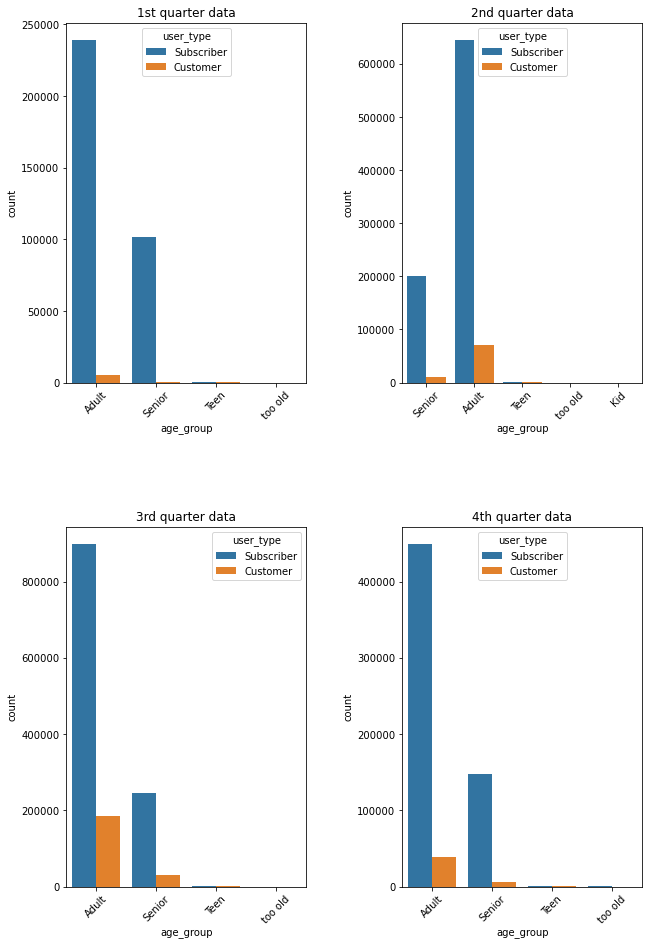

In [115]:
plot_relations(combined_data,'age_group','user_type')

we can see that adults hold the majority for our users although it is worth mentioning that the average age for our customers is less than that of our Subscribers, this will help us in the design of the ads and which age group to target

#### Q3 What do annaual users gain from the membership that casual users do not?

Unfortunately we do not have data to answer that question so we have our limitations even with this large dataset, we are looking for the pricing and how it is diffrent to the customers from the subscriber, how much a subscriber save during a ride, this questions will be a great help to us but since they are missing now would be the time where we reach to our stakeholders for more info and lunch a survay for customers to ask them for opinions about the pricing plans 

### Recommendations 

<ul>
<li>Start the marketing campain in the summer </li>
<li>Discounts in the weekends as these days have the most number of customers</li>
<li>Have discount coupons when a customer passes a certain duration</li>
<li>Target adults groups </li>
</ul>